<h1> Seaborn Implementation in EDA </h1>


<hr/>

<h2>Importing Seaborn, Numpy, Matplotlib.pyplot, Pandas, and Dataset</h2>

For this analysis we will be analyzing the battles from the 'Game of Thrones' series. 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

battles = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\GOT_data\battles.csv')
predict = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\GOT_data\character-predictions.csv')

battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
rows, cols = battles.shape
rows, cols

(38, 25)

In [6]:
#Rename attacker and defender columns: 
battles.rename(columns={'attacker_1':'primary_attacker', 'defender_1':'primary_defender'}, inplace=True)
battles.head(1)

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN


In [11]:
#Get uniqe values of attackers and their counts:
battles.attacker_king.value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [14]:
#Get unique values of battlefields and num of battles occured:
battles.location.value_counts()

Riverrun                                3
Winterfell                              3
Storm's End                             2
Harrenhal                               2
Darry                                   2
Moat Cailin                             2
Deepwood Motte                          2
Torrhen's Square                        2
Golden Tooth                            1
Seagard                                 1
Castle Black                            1
Shield Islands                          1
Saltpans                                1
Ruby Ford                               1
Ryamsport, Vinetown, Starfish Harbor    1
Dragonstone                             1
The Twins                               1
Red Fork                                1
Duskendale                              1
King's Landing                          1
Crag                                    1
Mummer's Ford                           1
Oxcross                                 1
Stony Shore                       

<hr/>

<h2>1. Plotting Battle Data</h2>

<b>Q. Of all the attackers, what were there army sizes?<b>

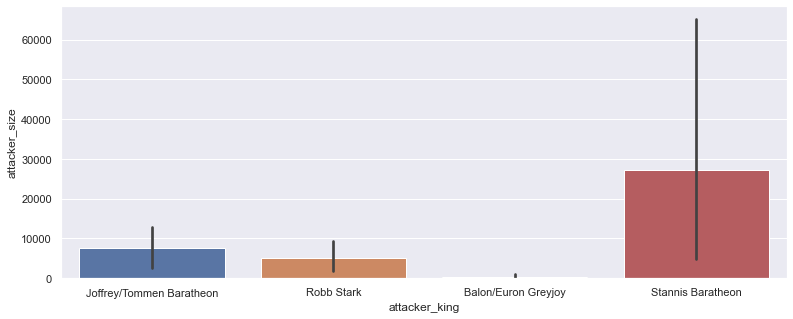

In [16]:
sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x='attacker_king',y='attacker_size',data=battles)
plt.show()

From the graph above, it appears that Stannis Baratheon mobilzes significantly larger force when he attacks. Additionally, it's apparent that Balon/Euron have a defensive-military mindset. 

<b>Q. Of all the kings who defended, what was their army size?</b>

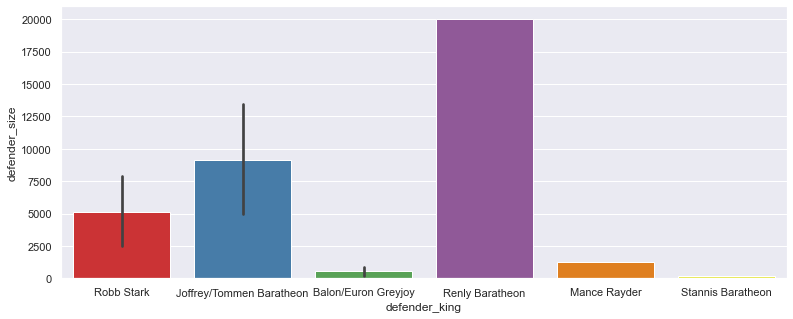

In [22]:
sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x='defender_king',y='defender_size',data=battles, palette='Set1')
plt.show()

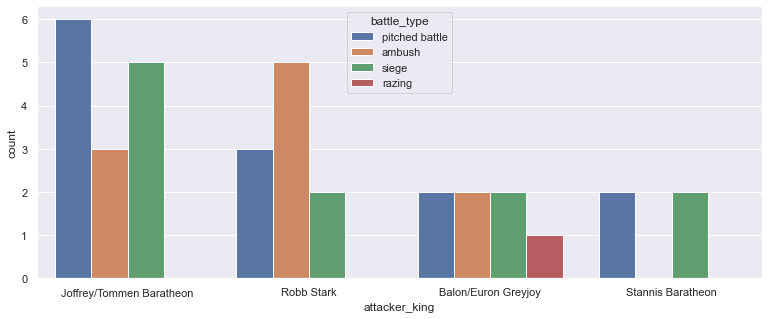

In [19]:
sns.countplot(x=battles['attacker_king'], hue=battles['battle_type'])
plt.show()

<hr/>

<h2>2. Analyzing 'Death' Dataset</h2>

In [55]:
deaths = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\GOT_data\character-deaths.csv')
deaths.columns = deaths.columns.str.lower()
deaths.head()

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,sos,ffc,dwd
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [56]:
deaths.gender = deaths.gender.apply(lambda x: 'Male' if x == 1 else 'Female')
deaths.nobility = deaths.nobility.apply(lambda x: True if x == 1 else False)
deaths.gender.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: gender, dtype: object

In [46]:
deaths.shape

(917, 13)

In [57]:
deaths.gender.value_counts()

Male      760
Female    157
Name: gender, dtype: int64

In [58]:
deaths.nobility.value_counts()

False    487
True     430
Name: nobility, dtype: int64

<h3>Plotting Death Data</h3>

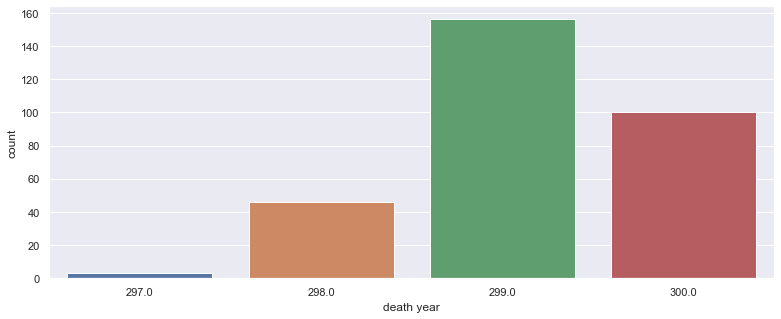

In [61]:
sns.countplot(deaths['death year'])
plt.show()

Close to 160 deaths occured in the year 299 and 100 deaths occurred in year 300. There was noticeable peace in year 297. 

C:\Users\Work\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


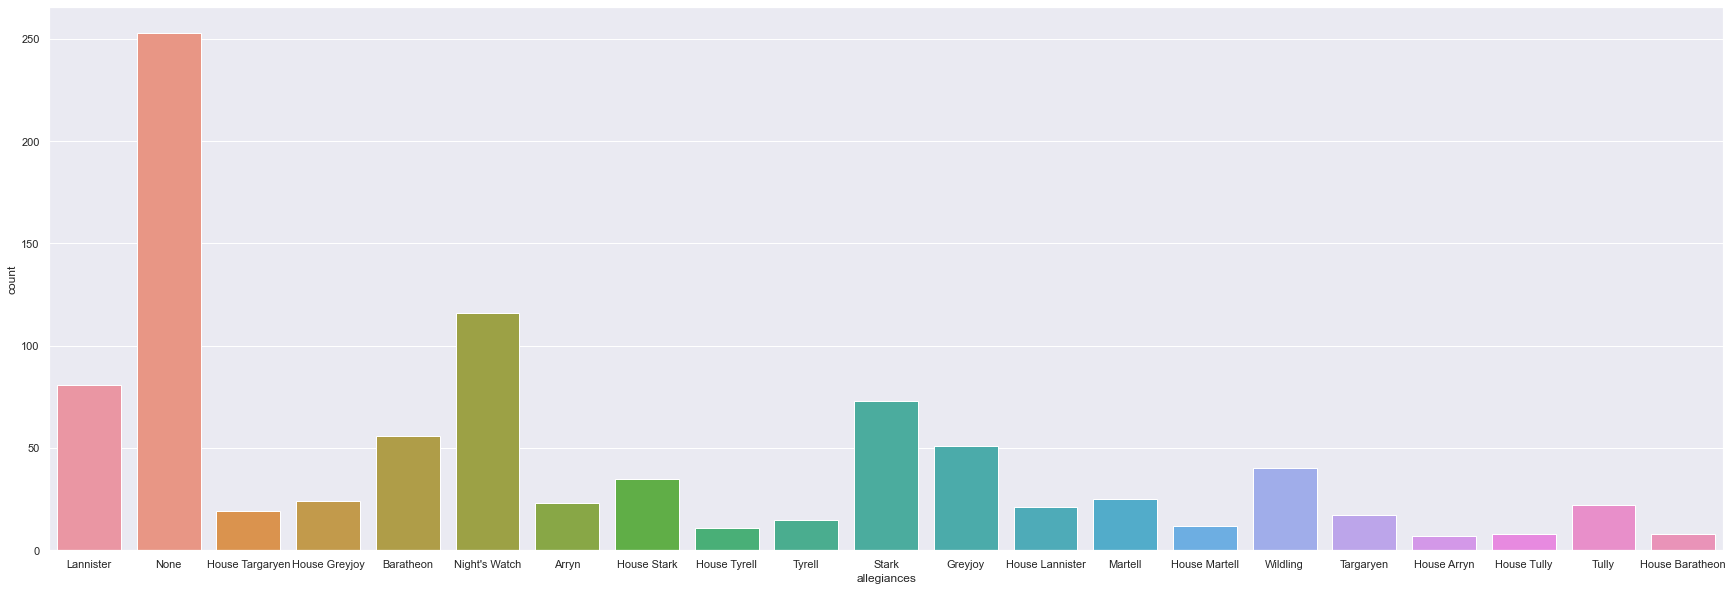

In [64]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(deaths['allegiances'])
plt.show()

Other than the non-allegiance deaths, many deaths have occured from the 'Nightwatcher' allegiance. 